In [1]:
%load_ext autoreload
%autoreload 2

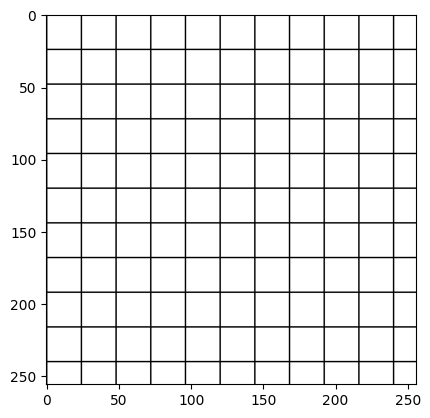

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 이미지 크기와 패치 크기 정의
image_size = 256
patch_size = 24

# 흰색 배경의 이미지 생성
image = np.ones((image_size, image_size, 3), dtype=np.uint8) * 255

# 그리드 라인 그리기
for i in range(0, image_size, patch_size):
    image[i:i+1, :] = 0  # 가로선
    image[:, i:i+1] = 0  # 세로선

# 이미지 출력
plt.imshow(image)
plt.show()



In [3]:
import cv2
import albumentations as A
from cosas.transforms import GridElasticTransform

transform = A.Compose([
    GridElasticTransform(p=1.0, always_apply=None, n_grid_height=8, n_grid_width=8, magnitude=4)
])

result = transform(image=image, mask=image)
transformed_image = result['image']
transformed_mask = result['mask']

/home/heon/anaconda3/envs/cosas/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


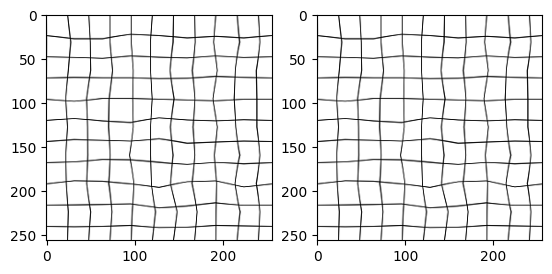

In [4]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2)
axes[0].imshow(result["image"])
axes[1].imshow(result["mask"])